In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")


In [ ]:
from google.colab import files
uploaded = files.upload()  # Загрузите файл через интерфейс
file_path = next(iter(uploaded))
df = pd.read_excel(file_path)

Saving clean.xlsx to clean (1).xlsx


<ipython-input-13-a9100e43fc0a>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres['rate'], y=top_genres['genres'], palette="coolwarm")


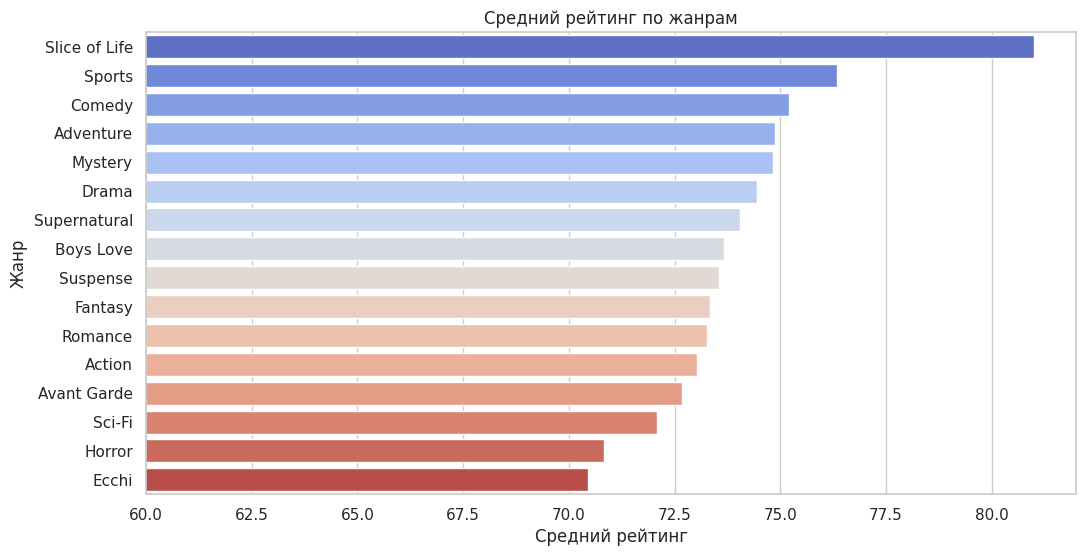

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# загрузили данные с нашими
df = pd.read_excel("clean.xlsx")

# Убираем пустые строки которые есть в жанрах и рейтингах используем метод dropna
# subset Параметр показывает, какие столбцы проверяют на наличие пропущенных результатов.
df_filtered = df.dropna(subset=['genres', 'rate'])

# Исключаем жанр "Award Winning" так как не является жанром case = false используем чтобы регистр не был чувствителен к регистру
#na=False: Если в ячейке есть пропущенное значение, то оно будет обработано, строки не будут удалены пустые
#Метод проверяет содержит есть в каждой строке наше значение ( )..str.contains()'genres''Award Winning'
df_filtered = df_filtered[~df_filtered['genres'].str.contains('Award Winning', case=False, na=False)]

# Метод применяется к столбцу и разбивает каждое значение в этом столбце на строку списка,
# используя запятую пробелом ( ) в качестве разделителя..str.split(', ')'genres',
# Метод используется для того чтобы каждое значение в таблице составляло отдельную строку..explode()'genres'
df_exploded = df_filtered.assign(genres=df_filtered['genres'].str.split(', ')).explode('genres')

# Считаем количество аниме в каждом жанре
genre_counts = df_exploded['genres'].value_counts()

# Оставляем только жанры, в которых ≥ 5 аниме
valid_genres = genre_counts[genre_counts >= 5].index
df_exploded = df_exploded[df_exploded['genres'].isin(valid_genres)]

# Группируем по жанру и считаем средний рейтинг
genre_avg = df_exploded.groupby('genres')['rate'].mean().reset_index()

# Берем топ-10 жанров по рейтингу
top_genres = genre_avg.sort_values(by="rate", ascending=False).head(100)

    # Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres['rate'], y=top_genres['genres'], palette="coolwarm")
plt.xlabel("Средний рейтинг")
plt.ylabel("Жанр")
plt.title("Средний рейтинг по жанрам")
plt.xlim(60, top_genres['rate'].max() + 1)  # Ось X начинается не с 0
plt.show()

<ipython-input-5-5141650b77e7>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_studios['rate'], y=top_studios['studios'], palette="coolwarm")


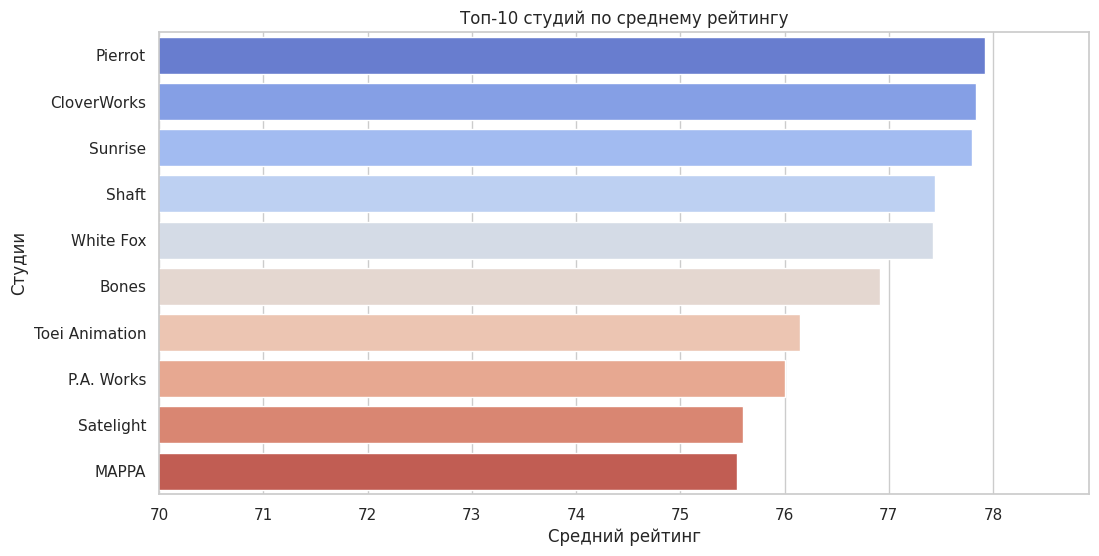

In [ ]:
# Убираем пустые значения
df_filtered = df.dropna(subset=['studios', 'rate']).copy()

# Разбираем studios (если несколько в одной строке)
df_filtered['studios'] = df_filtered['studios'].str.split(', ')
df_filtered = df_filtered.explode('studios')

# Считаем количество аниме у каждой студии
studio_counts = df_filtered['studios'].value_counts()

# Оставляем студии с ≥ 5 аниме
valid_studios = studio_counts[studio_counts >= 5].index
df_filtered = df_filtered[df_filtered['studios'].isin(valid_studios)]

# Группируем по студиям и считаем средний рейтинг
studio_ratings = df_filtered.groupby('studios')['rate'].mean().reset_index()

# Берем топ-10
top_studios = studio_ratings.sort_values(by='rate', ascending=False).head(10)

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=top_studios['rate'], y=top_studios['studios'], palette="coolwarm")
plt.xlabel("Средний рейтинг")
plt.ylabel("Студии")
plt.title("Топ-10 студий по среднему рейтингу")
plt.xlim(70, top_studios['rate'].max() + 1)
plt.show()


<ipython-input-6-c92b982bc334>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_studios['count'], y=top_studios['studios'], palette="coolwarm")


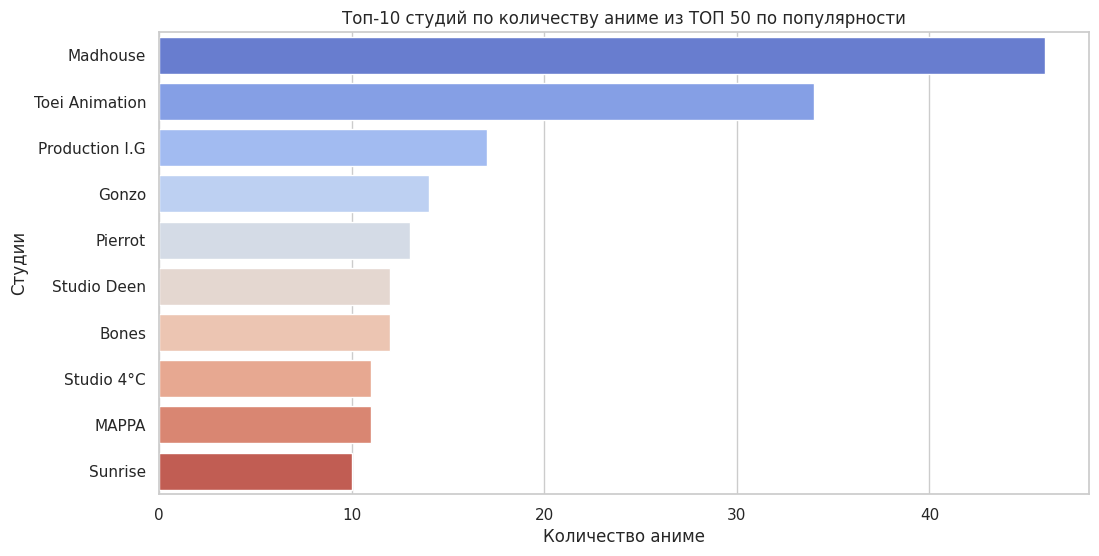

In [ ]:
# Убираем пустые значения
df_filtered = df.dropna(subset=['studios', 'rate']).copy()

# Разбираем studios (если несколько в одной строке)
df_filtered['studios'] = df_filtered['studios'].str.split(', ')
df_filtered = df_filtered.explode('studios')

# Фильтруем аниме с рейтингом > 23
df_filtered = df_filtered[df_filtered['rate'] > 23]

# Считаем количество аниме у каждой студии
studio_counts = df_filtered['studios'].value_counts()

# Группируем по студиям и считаем средний рейтинг
studio_ratings = df_filtered.groupby('studios').agg(count=('rate', 'size'), avg_rate=('rate', 'mean')).reset_index()

# Берем топ-10 по количеству аниме
top_studios = studio_ratings.sort_values(by='count', ascending=False).head(10)

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=top_studios['count'], y=top_studios['studios'], palette="coolwarm")
plt.xlabel("Количество аниме")
plt.ylabel("Студии")
plt.title("Топ-10 студий по количеству аниме из ТОП 50 по популярности")
plt.show()


<ipython-input-6-43df5f717c3c>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_avg['rate'], y=rating_avg['rating_x'], palette="coolwarm")


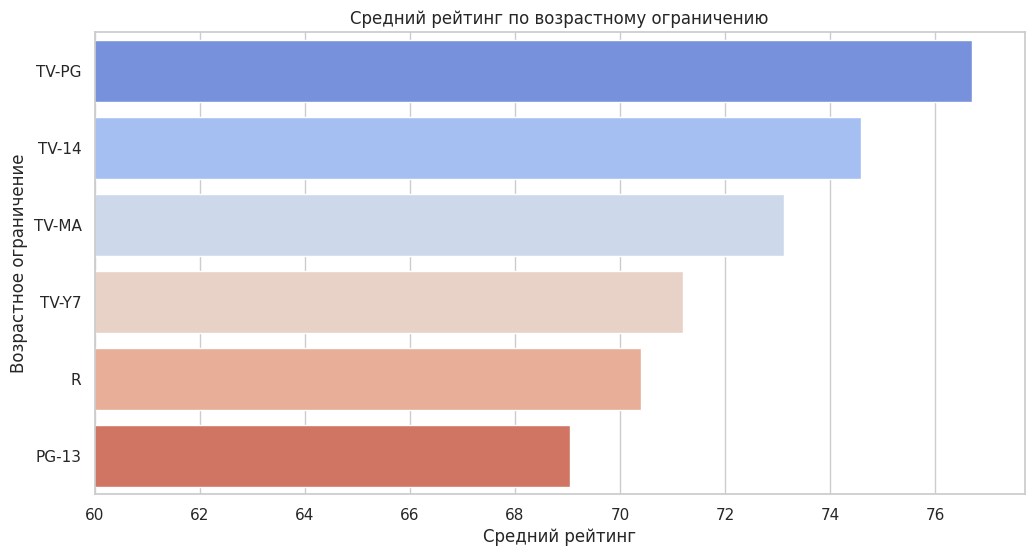

In [ ]:
# Убираем строки без рейтинга
df_filtered = df.dropna(subset=['rating_x', 'rate'])

# Исключаем ненужные возрастные рейтинги
excluded_ratings = ["Not found", "Not Rated", "Unrated"]
df_filtered = df_filtered[~df_filtered['rating_x'].isin(excluded_ratings)]

# Считаем количество аниме в каждом возрастном рейтинге
rating_counts = df_filtered['rating_x'].value_counts()

# Оставляем только возрастные рейтинги, где ≥ 5 аниме
valid_ratings = rating_counts[rating_counts >= 5].index
df_filtered = df_filtered[df_filtered['rating_x'].isin(valid_ratings)]

# Группируем по возрастному рейтингу и считаем средний рейтинг
rating_avg = df_filtered.groupby('rating_x')['rate'].mean().reset_index()

# Сортируем по убыванию среднего рейтинга
rating_avg = rating_avg.sort_values(by="rate", ascending=False)

    # Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=rating_avg['rate'], y=rating_avg['rating_x'], palette="coolwarm")
plt.xlabel("Средний рейтинг")
plt.ylabel("Возрастное ограничение")
plt.title("Средний рейтинг по возрастному ограничению")
plt.xlim(60, rating_avg['rate'].max() + 1)  # Ось X начинается не с 0
plt.show()

<ipython-input-7-603507dac97e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sources['rate'], y=top_sources['source'], palette="coolwarm")


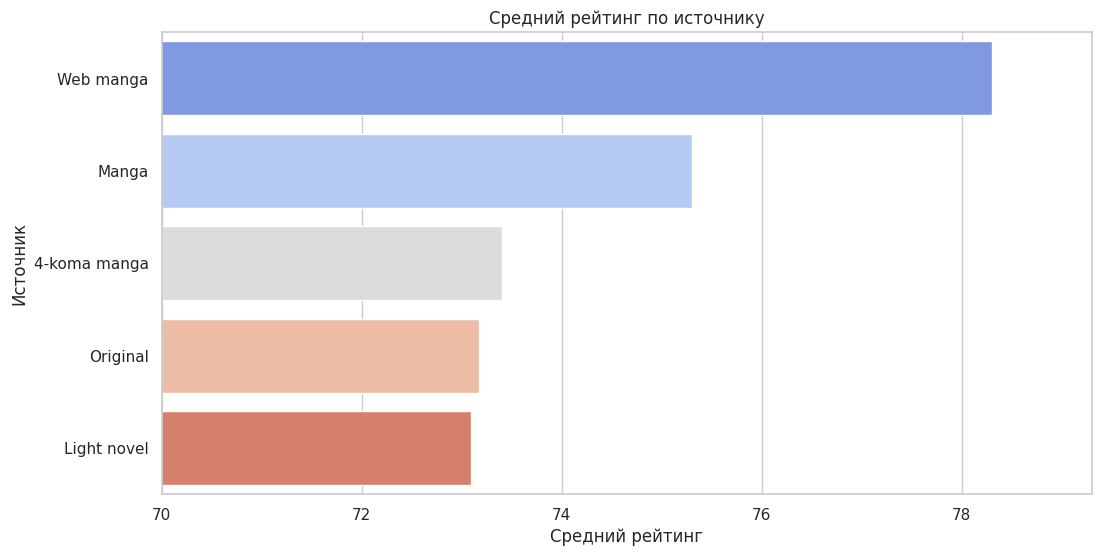

In [ ]:
# Убираем пустые значения
df_filtered = df.dropna(subset=['source', 'rate'])

# Считаем количество аниме по источнику
source_counts = df_filtered['source'].value_counts()

# Оставляем источники с ≥ 5 аниме
valid_sources = source_counts[source_counts >= 5].index
df_filtered = df_filtered[df_filtered['source'].isin(valid_sources)]

# Группируем по source и считаем средний рейтинг
source_avg = df_filtered.groupby('source')['rate'].mean().reset_index()

# Берем топ-5 источников
top_sources = source_avg.sort_values(by='rate', ascending=False).head(5)

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sources['rate'], y=top_sources['source'], palette="coolwarm")
plt.xlabel("Средний рейтинг")
plt.ylabel("Источник")
plt.title("Средний рейтинг по источнику")
plt.xlim(70, top_sources['rate'].max() + 1)
plt.show()

<ipython-input-19-d31b31a78158>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_licensors.values, y=top_licensors.index, palette="coolwarm")


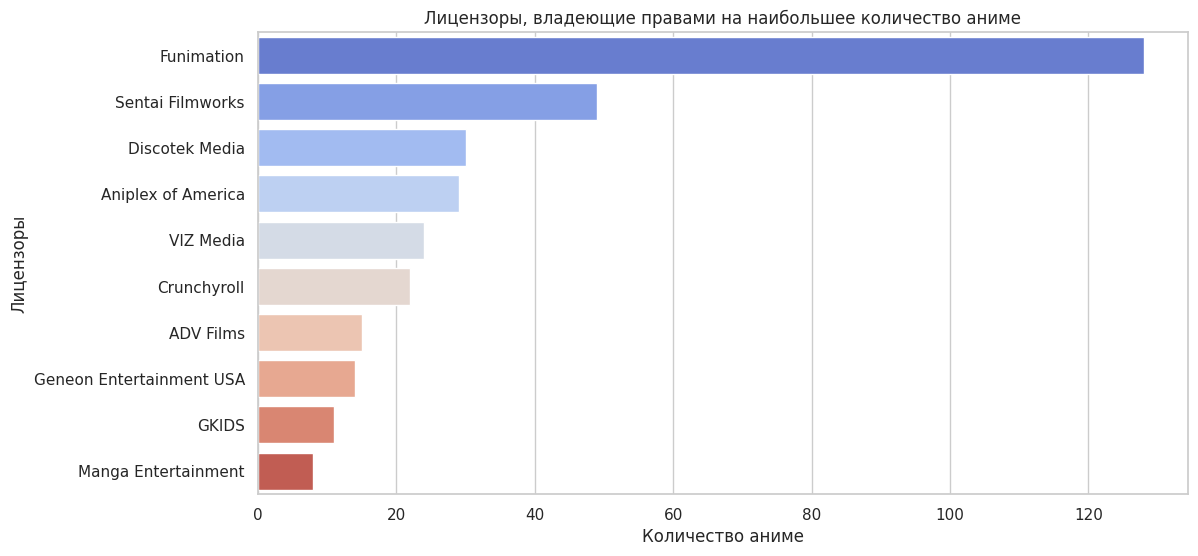

In [ ]:
# Разбираем licensors (если несколько в одной строке)
df_exploded_licensors = df.dropna(subset=['licensors']).copy()
df_exploded_licensors['licensors'] = df_exploded_licensors['licensors'].str.split(', ')
df_exploded_licensors = df_exploded_licensors.explode('licensors')

# Подсчет количества аниме у каждого лицензиара
top_licensors = df_exploded_licensors['licensors'].value_counts().head(10)

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=top_licensors.values, y=top_licensors.index, palette="coolwarm")
plt.xlabel("Количество аниме")
plt.ylabel("Лицензоры")
plt.title("Лицензоры, владеющие правами на наибольшее количество аниме")
plt.show()

<ipython-input-25-46fce956a5c0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_licensors.values, y=top_licensors.index, palette="coolwarm")


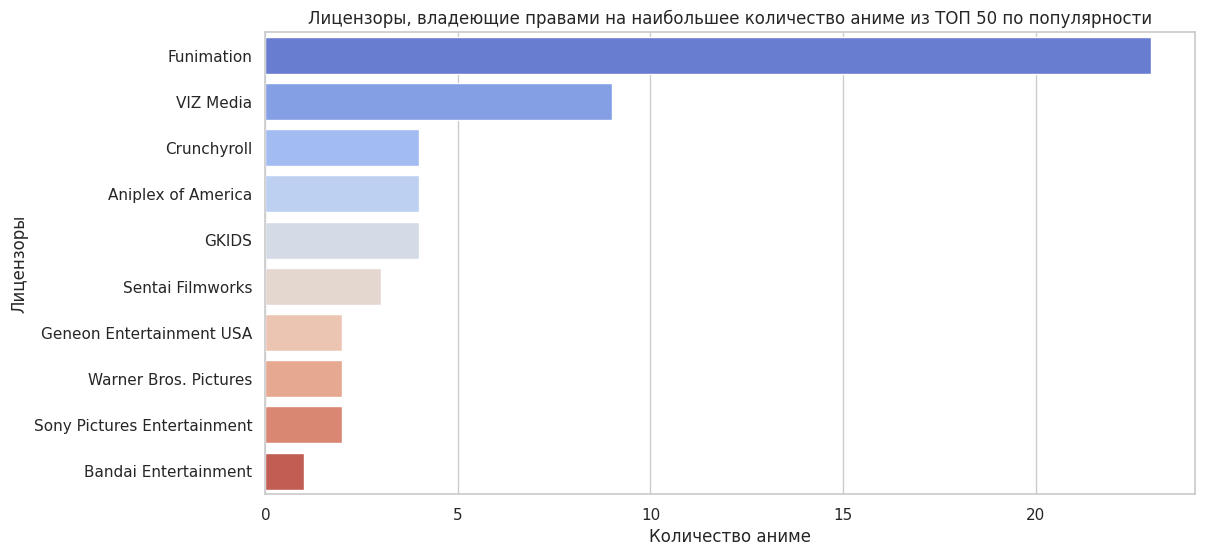

In [ ]:
df_filtered = df[df['rates'] > 23].dropna(subset=['licensors']).copy()

# Разделение licensors, если их несколько в одной строке
df_filtered['licensors'] = df_filtered['licensors'].str.split(', ')
df_exploded_licensors = df_filtered.explode('licensors')

# Подсчет количества аниме у каждого лицензиара
top_licensors = df_exploded_licensors['licensors'].value_counts().head(10)

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=top_licensors.values, y=top_licensors.index, palette="coolwarm")
plt.xlabel("Количество аниме")
plt.ylabel("Лицензоры")
plt.title("Лицензоры, владеющие правами на наибольшее количество аниме из ТОП 50 по популярности")
plt.show()


<ipython-input-38-443d48b735f3>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_durations['duration_y'], y=top_durations['rate'], palette="magma")


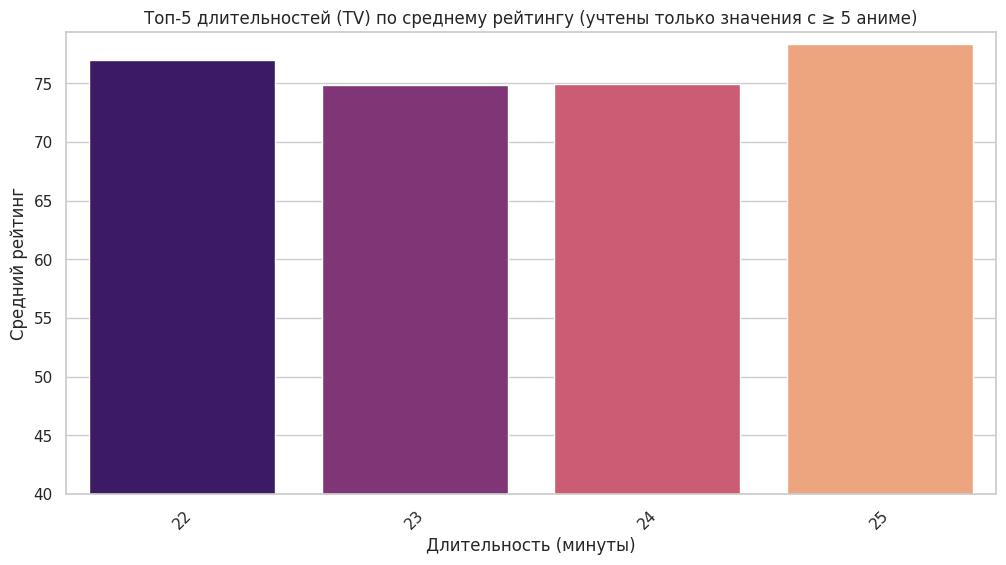

In [ ]:
# Функция перевода в минуты
def convert_duration(duration):
    if pd.isna(duration):
        return np.nan
    duration = str(duration).lower().strip()

    if "min" in duration and "hr" not in duration:
        return int(duration.split()[0])
    elif "hr" in duration and "min" not in duration:
        return int(duration.split()[0]) * 60
    elif "hr" in duration and "min" in duration:
        parts = duration.replace("hr", "").replace("min", "").split()
        hours = int(parts[0]) * 60
        minutes = int(parts[1]) if len(parts) > 1 else 0
        return hours + minutes
    return np.nan

# Оставляем только TV-аниме
df_tv = df[df['type'].str.lower() == 'tv'].copy()
df_tv['duration_y'] = df_tv['duration_y'].apply(convert_duration)

# Убираем NaN
df_tv = df_tv.dropna(subset=['duration_y'])

# Считаем количество аниме по длительности
duration_counts = df_tv['duration_y'].value_counts()

# Оставляем только длительности с ≥ 5 аниме
valid_durations = duration_counts[duration_counts >= 10].index
df_tv_filtered = df_tv[df_tv['duration_y'].isin(valid_durations)]

# Группируем по длительности и считаем средний рейтинг
duration_avg = df_tv_filtered.groupby('duration_y')['rate'].mean().reset_index()

# Берем топ-5 самых длинных
top_durations = duration_avg.sort_values(by="duration_y", ascending=False).head(10)

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=top_durations['duration_y'], y=top_durations['rate'], palette="magma")
plt.xlabel("Длительность (минуты)")
plt.ylabel("Средний рейтинг")
plt.title("Топ-5 длительностей (TV) по среднему рейтингу (учтены только значения с ≥ 5 аниме)")
plt.xticks(rotation=45)
plt.ylim(40, top_durations['rate'].max() + 1)
plt.show()

Топ-10 длительностей (Movie) с самым высоким рейтингом:
   duration_y       rate
2          26  78.000000
7          57  78.000000
9         120  76.333333
3          37  75.000000
6          52  71.000000
8          60  70.212766
1          16  70.000000
0          14  69.000000
5          48  66.000000
4          42  56.000000


<ipython-input-130-1da74744c0a2>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_durations['duration_y'], y=top_durations['rate'], palette="magma")


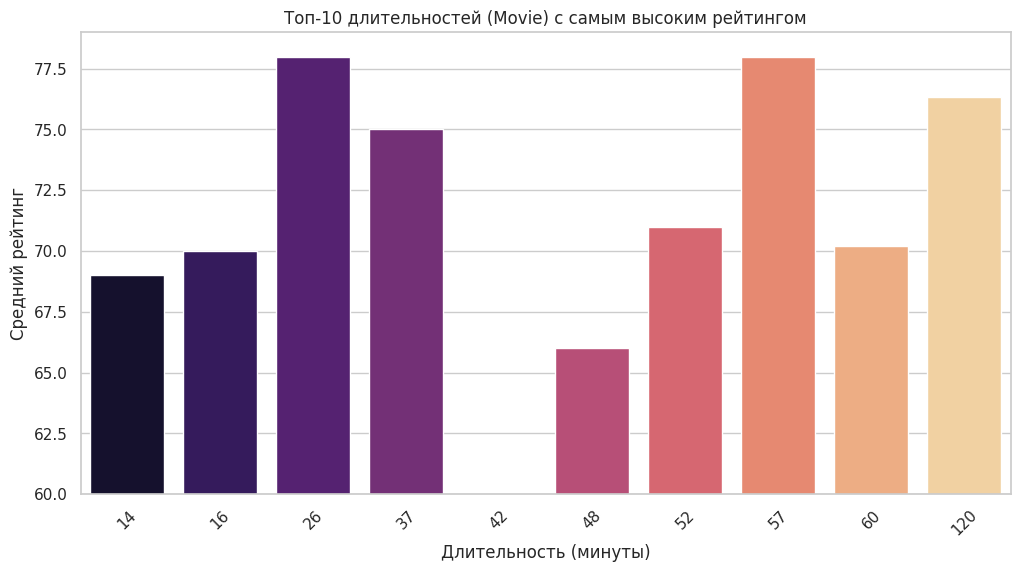

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Функция перевода в минуты
def convert_duration(duration):
    if pd.isna(duration):
        return np.nan
    duration = str(duration).lower().strip()

    if "min" in duration and "hr" not in duration:
        return int(duration.split()[0])
    elif "hr" in duration and "min" not in duration:
        parts = duration.replace("hr", "").replace("min", "").split()
        hours = int(parts[0]) * 60
        minutes = int(parts[1]) if len(parts) > 1 else 0
        return hours + minutes
    elif "hr" in duration:
        return int(duration.split()[0]) * 60
    return np.nan

# Загружаем данные
df = pd.read_excel("clean.xlsx")  # Подставь свой файл

# Оставляем только фильмы
df_movie = df[df['type'].str.lower() == 'movie'].copy()

# Конвертируем длительность в минуты
df_movie['duration_y'] = df_movie['duration_y'].apply(convert_duration)

# Убираем NaN
df_movie = df_movie.dropna(subset=['duration_y'])

# Группируем по длительности и считаем средний рейтинг
duration_avg = df_movie.groupby('duration_y')['rate'].mean().reset_index()

# Берем топ-10 по рейтингу
top_durations = duration_avg.sort_values(by="rate", ascending=False).head(10)

# Проверяем, есть ли данные для графика
if top_durations.empty:
    print("Нет данных для построения графика.")
else:
    print("Топ-10 длительностей (Movie) с самым высоким рейтингом:")
    print(top_durations)

    # Визуализация
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_durations['duration_y'], y=top_durations['rate'], palette="magma")
    plt.xlabel("Длительность (минуты)")
    plt.ylabel("Средний рейтинг")
    plt.title("Топ-10 длительностей (Movie) с самым высоким рейтингом")
    plt.xticks(rotation=45)
    plt.ylim(60, top_durations['rate'].max() + 1)
    plt.show()

<ipython-input-9-e1fe3206125d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_avg['rate'], y=type_avg['type'], palette="coolwarm")


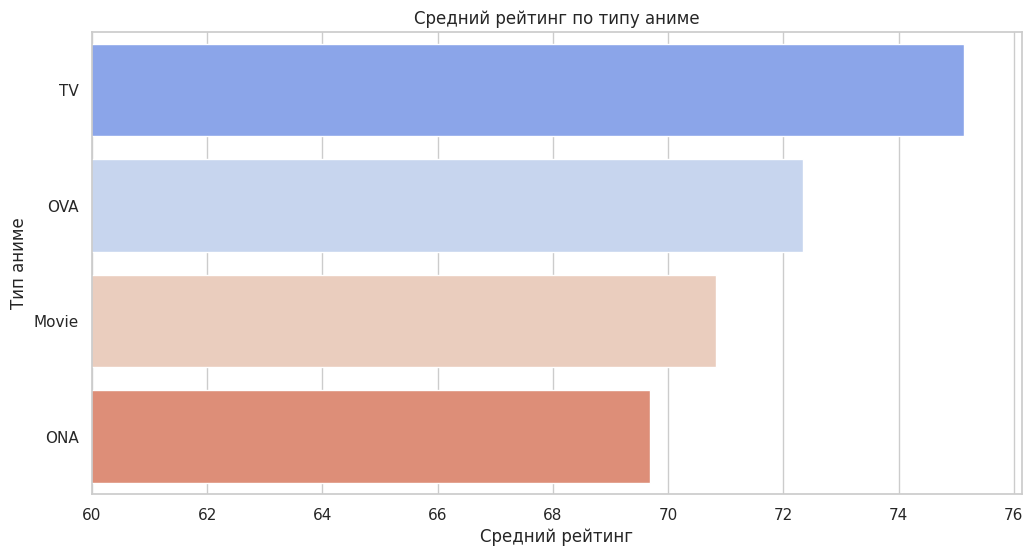

In [ ]:
# Убираем пустые значения в типе и рейтинге
df_filtered = df.dropna(subset=['type', 'rate'])

# Считаем количество аниме по каждому типу
type_counts = df_filtered['type'].value_counts()

# Оставляем только типы, у которых ≥ 5 аниме
valid_types = type_counts[type_counts >= 5].index
df_filtered = df_filtered[df_filtered['type'].isin(valid_types)]

# Группируем по типу и считаем средний рейтинг
type_avg = df_filtered.groupby('type')['rate'].mean().reset_index()

# Сортируем по убыванию рейтинга
type_avg = type_avg.sort_values(by='rate', ascending=False)

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=type_avg['rate'], y=type_avg['type'], palette="coolwarm")
plt.xlabel("Средний рейтинг")
plt.ylabel("Тип аниме")
plt.title("Средний рейтинг по типу аниме")
plt.xlim(60, type_avg['rate'].max() + 1)  # Ось X начинается не с 0
plt.show()

<ipython-input-56-ce3c0a936973>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_episodes.index, y=avg_rating_episodes.values, palette="viridis")


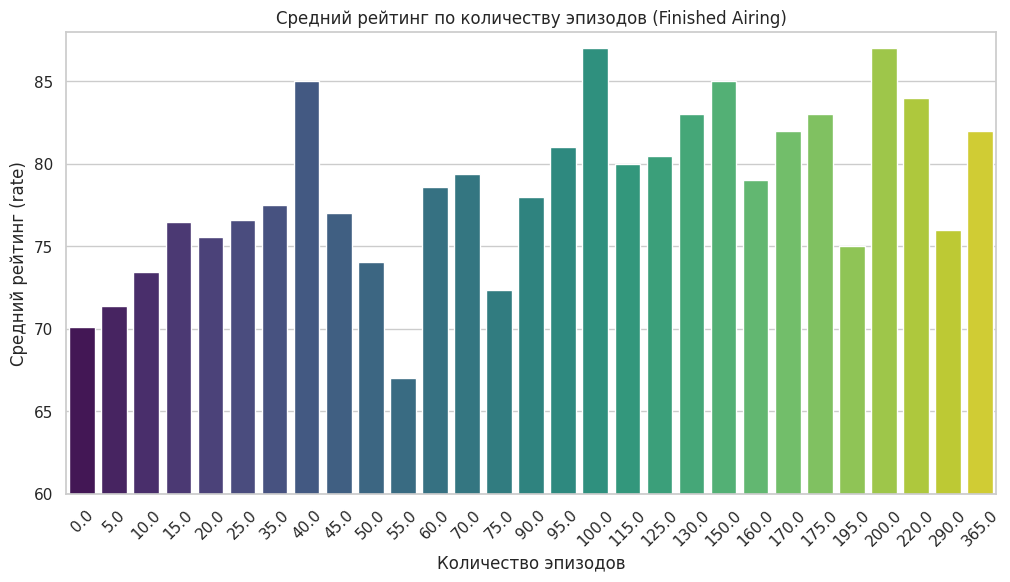

In [ ]:
# Приводим статус к единому формату
df['status'] = df['status'].str.strip().str.lower()

# Фильтруем только Finished Airing
df_finished = df[df['status'] == 'finished airing'].copy()

# Преобразуем episodes в числа (если там есть строки или NaN)
df_finished['episodes'] = pd.to_numeric(df_finished['episodes'], errors='coerce')

# Убираем строки с NaN в episodes
df_finished = df_finished.dropna(subset=['episodes'])

# Создаем интервалы по 5 эпизодов
df_finished['episodes_bin'] = (df_finished['episodes'] // 5) * 5

# Средний рейтинг по интервалам количества эпизодов (отсортировано по убыванию)
avg_rating_episodes = df_finished.groupby('episodes_bin')['rate'].mean().sort_values(ascending=False)

# Проверяем, есть ли данные
if avg_rating_episodes.empty:
    print("Нет данных для графика. Проверь, есть ли аниме со статусом 'Finished Airing'.")
else:
    # Визуализация
    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_rating_episodes.index, y=avg_rating_episodes.values, palette="viridis")
    plt.xlabel("Количество эпизодов")
    plt.ylabel("Средний рейтинг (rate)")
    plt.title("Средний рейтинг по количеству эпизодов (Finished Airing)")
    plt.xticks(rotation=45)
    plt.ylim(60, avg_rating_episodes.max() + 1)
    plt.show()